# Advanced Physical Modelling

It's unlikely that the `cloud()` model will be sufficient for all your modelling needs. In this notebook, we demonstrate the process the UCLCHEM team usually follow to model more complex systems such as hot cores or shocks.

In [8]:
import uclchem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initial Conditions


In [9]:
# set a parameter dictionary for phase 1 collapse model

outSpecies = "SO CO"
param_dict = {
    "switch": 0,#stop at finalTime#
    "initialDens": 2e4, #starting density
    "initialTemp": 10.0,#temperature of gas
    "finalTime": 1.5e6, #final time
    "rout":0.2, #radius of cloud in pc
    "baseAv":1.0, #visual extinction at cloud edge.
    "points":13,
    "outputFile": "../test/collapse.dat",#full UCLCHEM output
    "abundLoadFile": "../test/startcollapse.dat",#save final abundances to file
}
#result = uclchem.collapse("filament","../test/physics.dat",param_dict)


In [10]:
df=uclchem.read_output_file(param_dict["outputFile"])

/tmp/ipykernel_14627/1151531231.py:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df=uclchem.read_output_file(param_dict["outputFile"])


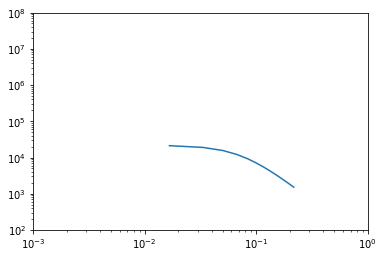

In [14]:
fig,ax=plt.subplots()
for time in [1e-7,1.05e6,1.1e6]:
    idx=df["Time"]>time
    dens=df.loc[idx,"Density"].values[:13]
    point=df.loc[idx,"point"].values[:13]*param_dict["rout"]/12.0
    ax.plot(point,dens)
    ax.set(yscale="log",xscale="log",xlim=(1e-3,1),ylim=(1e2,1e8))


<AxesSubplot:>

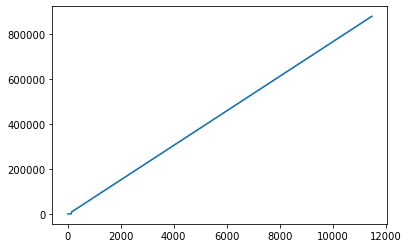

In [15]:
df["Time"].plot()

In [13]:
a=4559298747553.3848
b=124502560320.51286
SECONDS_PER_YEAR=3.16e7

In [17]:
a/SECONDS_PER_YEAR

144281.6059352337

In [18]:
b/SECONDS_PER_YEAR

3939.954440522559